In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [2]:
import os
import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# data normalization
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y


# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

print("The shape of x_train", x_train.shape)
print("The shape of y_train", y_train.shape)
print("The shape of x_test", x_test.shape)
print("The shape of y_test", y_test.shape)

Using TensorFlow backend.


170500096/170498071 [==============================] - 6s 0us/step
The shape of x_train (50000, 3072)
The shape of y_train (50000, 10)
The shape of x_test (10000, 3072)
The shape of y_test (10000, 10)


In [0]:
# hyperparameters
LEARNING_RATE = 1e-3
EPOCHS = 30
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, MaxPooling2D, MaxPool2D, BatchNormalization,AveragePooling2D

# construction a model with dropout layer
def build_mlp(input_shape, output_units=10):
    input_layer = keras.layers.Input(input_shape)
    model = Sequential()
    
    # layer 1
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    # layer 2
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    # layer 3
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(BatchNormalization())
    
    # layer 4
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

In [5]:
# using SGD as optimizer for training
# 
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

results = {} # for plotting later
for bs in BATCH_SIZE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with Batch size = %.6f" % (bs))
    model = build_mlp(input_shape=x_train.shape[1:])
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=bs, 
              validation_data=(x_test, y_test), 
              shuffle=True,verbose=2)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-batchsize-%s" % str(bs)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

W0802 14:18:54.497249 139802305517440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:95: The name tf.reset_default_graph is deprecated. Please use tf.compat.v1.reset_default_graph instead.

W0802 14:18:54.499860 139802305517440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:98: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0802 14:18:54.515703 139802305517440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:102: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0802 14:18:54.517356 139802305517440 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W080

Experiment with Batch size = 2.000000


W0802 14:18:55.149161 139802305517440 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 50000 samples, validate on 10000 samples
Epoch 1/30
 - 236s - loss: 2.3080 - acc: 0.1467 - val_loss: 2.1802 - val_acc: 0.2102
Epoch 2/30
 - 234s - loss: 2.2340 - acc: 0.1680 - val_loss: 2.1487 - val_acc: 0.2240
Epoch 3/30
 - 234s - loss: 2.2396 - acc: 0.1629 - val_loss: 2.2207 - val_acc: 0.1752
Epoch 4/30
 - 234s - loss: 2.2365 - acc: 0.1636 - val_loss: 2.2031 - val_acc: 0.1681
Epoch 5/30
 - 233s - loss: 2.2350 - acc: 0.1653 - val_loss: 2.2828 - val_acc: 0.1961
Epoch 6/30
 - 234s - loss: 2.2191 - acc: 0.1713 - val_loss: 2.3846 - val_acc: 0.1841
Epoch 7/30
 - 233s - loss: 2.2231 - acc: 0.1715 - val_loss: 2.7361 - val_acc: 0.2002
Epoch 8/30
 - 233s - loss: 2.2329 - acc: 0.1651 - val_loss: 3.2814 - val_acc: 0.1639
Epoch 9/30
 - 234s - loss: 2.2404 - acc: 0.1634 - val_loss: 3.3090 - val_acc: 0.1548
Epoch 10/30
 - 236s - loss: 2.2316 - acc: 0.1647 - val_loss: 3.7918 - val_acc: 0.1745
Epoch 11/30
 - 236s - loss: 2.2428 - acc: 0.1619 - val_loss: 3.7990 - val_acc: 0.1789
Epoch 12/30
 

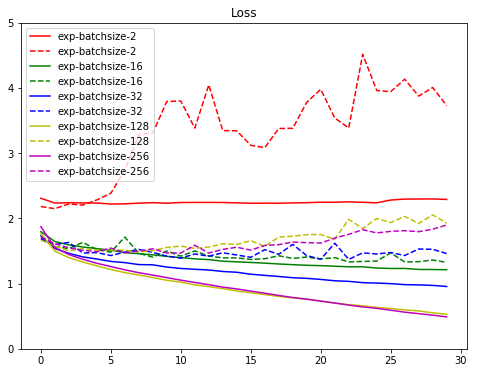

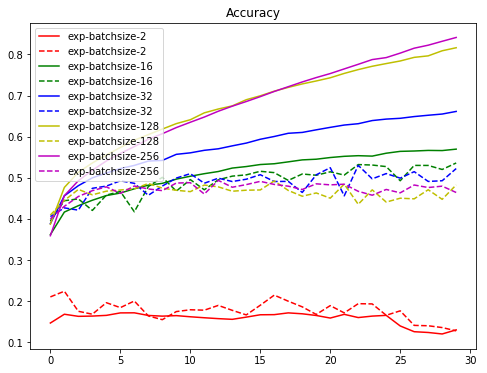

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [0]:
# move the batch normalization layer before the activation layer
def build_mlp(input_shape, output_units=10):
    input_layer = keras.layers.Input(input_shape)
    model = Sequential()
    
    # layer 1
    model.add(Dense(512))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # layer 2
    model.add(Dense(256))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # layer 3
    model.add(Dense(128))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # layer 4
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

HW2 let the batch normalization layer behind the activation layer
compare the result with examples

In [0]:
# hyperparameters 
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

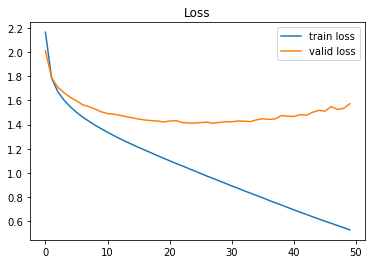

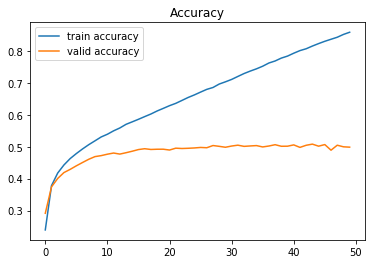

In [9]:
model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,verbose=0)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

HW3 let the batchnormalization layer right after the input layer

In [0]:
def build_mlp(input_shape, output_units=10):
    input_layer = keras.layers.Input(input_shape)
    model = Sequential()
    
    # layer 1
    model.add(BatchNormalization())
    model.add(Dense(512))
    model.add(Activation('relu'))
    
    # layer 2
    model.add(Dense(256))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # layer 3
    model.add(Dense(128))
    #model.add(BatchNormalization())
    model.add(Activation('relu'))
    
    # layer 4
    model.add(Dense(10))
    model.add(Activation('softmax'))

    return model

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
 - 3s - loss: 2.2036 - acc: 0.2132 - val_loss: 1.9668 - val_acc: 0.3040
Epoch 2/50
 - 2s - loss: 1.8854 - acc: 0.3359 - val_loss: 1.8102 - val_acc: 0.3631
Epoch 3/50
 - 2s - loss: 1.7629 - acc: 0.3826 - val_loss: 1.7259 - val_acc: 0.3934
Epoch 4/50
 - 2s - loss: 1.6876 - acc: 0.4093 - val_loss: 1.6730 - val_acc: 0.4135
Epoch 5/50
 - 2s - loss: 1.6339 - acc: 0.4292 - val_loss: 1.6344 - val_acc: 0.4265
Epoch 6/50
 - 2s - loss: 1.5922 - acc: 0.4449 - val_loss: 1.6036 - val_acc: 0.4390
Epoch 7/50
 - 2s - loss: 1.5562 - acc: 0.4576 - val_loss: 1.5791 - val_acc: 0.4471
Epoch 8/50
 - 2s - loss: 1.5246 - acc: 0.4680 - val_loss: 1.5583 - val_acc: 0.4545
Epoch 9/50
 - 2s - loss: 1.4966 - acc: 0.4773 - val_loss: 1.5398 - val_acc: 0.4594
Epoch 10/50
 - 2s - loss: 1.4701 - acc: 0.4904 - val_loss: 1.5233 - val_acc: 0.4657
Epoch 11/50
 - 2s - loss: 1.4457 - acc: 0.4974 - val_loss: 1.5087 - val_acc: 0.4695
Epoch 12/50
 - 2s - loss: 1.4224 - 

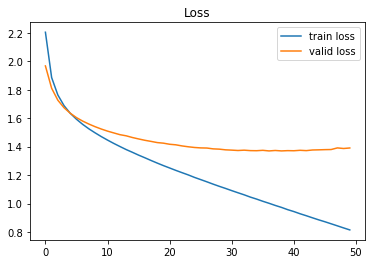

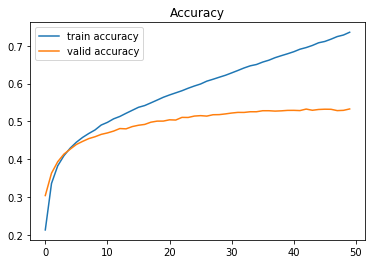

In [11]:
model = build_mlp(input_shape=x_train.shape[1:])
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True,verbose=2)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()